Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.
Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Как понять, что клиент больше не с вами? Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо.
Индикаторы оттока зависят от специфики отрасли. Когда пользователь редко, но стабильно закупается в интернет-магазине — не похоже, что он «отвалился». А вот если две недели не заходит на канал с ежедневно обновляемым контентом, дела плохи: подписчик заскучал и, кажется, оставил вас.
Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Конечно, не исключено, что он уехал на Бали и по приезде обязательно продолжит ходить на фитнес. Однако чаще бывает наоборот. Если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал — скорее всего, он не вернётся.
Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. Ваша задача — провести анализ и подготовить план действий по удержанию клиентов.
А именно:
научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
проанализировать основные признаки, наиболее сильно влияющие на отток;
сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
1) выделить целевые группы клиентов;
2) предложить меры по снижению оттока;
3) определить другие особенности взаимодействия с клиентами.

In [1]:
import pandas as pd
import numpy as np
import math

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# для полного отображения содержимого столбцов
pd.set_option('display.max_colwidth', -1)
# импорт sklearn и ее методов/алгоритмов
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, mean_squared_error, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format
sns.set(rc={'figure.figsize':(16,9)})

# Проведите исследовательский анализ данных (EDA)

In [3]:
path = '/datasets/gym_churn.csv'
df = pd.read_csv(path)
df

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.23,5.00,3,0.02,0.00,0
1,0,1,0,0,1,12,1,31,113.20,12.00,7,1.92,1.91,0
2,0,1,1,0,1,1,0,28,129.45,1.00,2,1.86,1.74,0
3,0,1,1,1,1,12,1,33,62.67,12.00,2,3.21,3.36,0
4,1,1,1,1,1,1,0,26,198.36,1.00,3,1.11,1.12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.41,12.00,8,2.28,2.35,0
3996,0,1,0,0,1,1,1,29,68.88,1.00,1,1.28,0.29,1
3997,1,1,1,1,1,12,0,28,78.25,11.00,2,2.79,2.83,0
3998,0,1,1,1,1,6,0,32,61.91,5.00,3,1.63,1.60,0


In [4]:
df.columns = df.columns.str.lower()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
near_location                        4000 non-null int64
partner                              4000 non-null int64
promo_friends                        4000 non-null int64
phone                                4000 non-null int64
contract_period                      4000 non-null int64
group_visits                         4000 non-null int64
age                                  4000 non-null int64
avg_additional_charges_total         4000 non-null float64
month_to_end_contract                4000 non-null float64
lifetime                             4000 non-null int64
avg_class_frequency_total            4000 non-null float64
avg_class_frequency_current_month    4000 non-null float64
churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


In [6]:
df.duplicated().sum()

0

#### Итак, в нашем датафрейме почти все готово. Пропусков нет, дубликатов нет. Названия столбцов привели к нижнему регистру, для удобства. Можно приступать.

In [7]:
df.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,"4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00"
mean,0.51,0.85,0.49,0.31,0.90,4.68,0.41,29.18,146.94,4.32,3.72,1.88,1.77,0.27
std,0.50,0.36,0.50,0.46,0.30,4.55,0.49,3.26,96.36,4.19,3.75,0.97,1.05,0.44
min,0.00,0.00,0.00,0.00,0.00,1.00,0.00,18.00,0.15,1.00,0.00,0.00,0.00,0.00
25%,0.00,1.00,0.00,0.00,1.00,1.00,0.00,27.00,68.87,1.00,1.00,1.18,0.96,0.00
50%,1.00,1.00,0.00,0.00,1.00,1.00,0.00,29.00,136.22,1.00,3.00,1.83,1.72,0.00
75%,1.00,1.00,1.00,1.00,1.00,6.00,1.00,31.00,210.95,6.00,5.00,2.54,2.51,1.00
max,1.00,1.00,1.00,1.00,1.00,12.00,1.00,41.00,552.59,12.00,31.00,6.02,6.15,1.00


Вывод из использования функции describe:  
- Мужчин и женщин в фитнес-клубе одинаковое количество  
- Больше тех кто проживает вблизи фитнеса - 85%  
- Почти половина клиентов сотрудники компаний-партнеров  
- 30 % приводят друзья  
- 90 % пользователей оставляют свой номер телефона  
- в основном абонемент покупают на 6 месяцев  
- более 41% посещают груповые занятия  
- основной возраст клиентов 29 лет, самому молодому 18 лет, самому старшему 41 год.  
- в среднем дополнительные покупки делают на 146 у.е., медианное значение 136 у.е.  
- среднее количество месяцев посещения 3,7  
- среднее количество посещений в неделю за все время практически совпадает с количеством за текущий месяц и составляет ~2 посещения в неделю  
- средний отток составляет 26 %  

## Посмотрите на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался (воспользуйтесь методом groupby())

In [8]:
churn_group = df.groupby('churn').mean()
churn_group_new = churn_group.transpose()
churn_group_new

churn,0,1
gender,0.51,0.51
near_location,0.87,0.77
partner,0.53,0.36
promo_friends,0.35,0.18
phone,0.90,0.90
contract_period,5.75,1.73
group_visits,0.46,0.27
age,29.98,26.99
avg_additional_charges_total,158.45,115.08
month_to_end_contract,5.28,1.66


#### Вывод:  
Среди тех кто остался, больше всего тех, кто  
- рядом живет  
- сотрудник компании-партнера  
- пришел с другом/друзьями  
- давно (около полугода) в клубе  
- посещает групповые занятия  
- кто постарше  
- кто больше тратит на доп.услуги (но разница незначительна)  
- у кого до конца абонемента еще полгода  
- у постоянных клиентов (кто давно в клубе)  
- посещает фитнес от 2-х раз в неделю

## Постройте столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток);

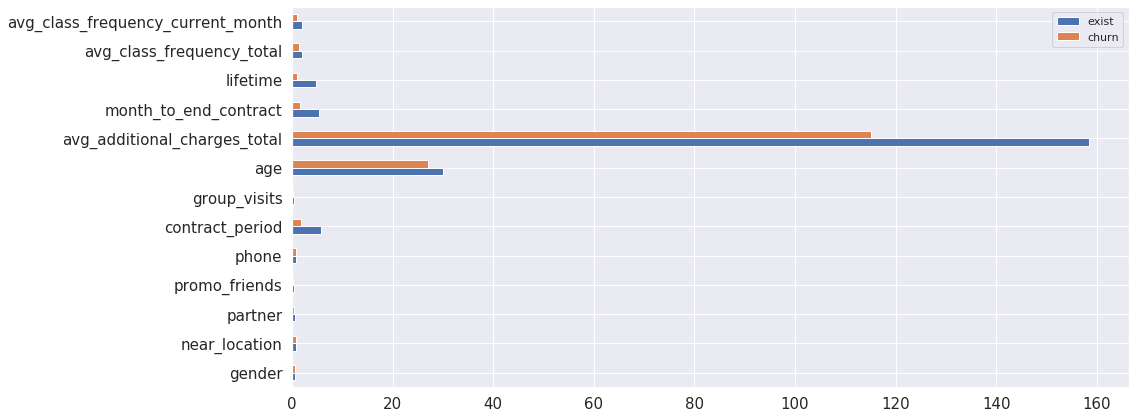

In [9]:
churn_group_new.columns = ['exist', 'churn']
churn_group_new.plot(kind='barh',figsize=(15, 7), fontsize=15)

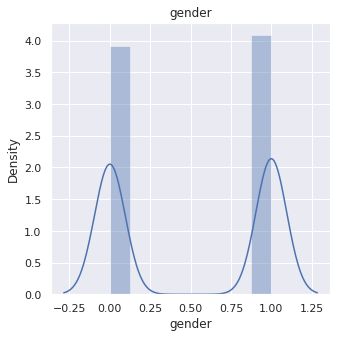

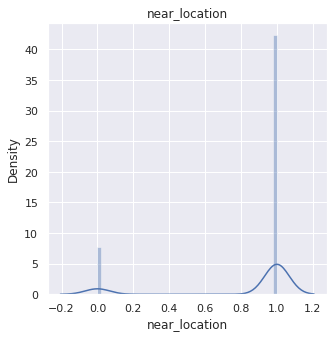

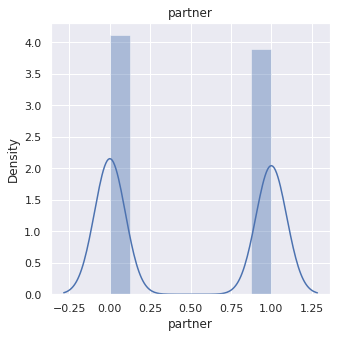

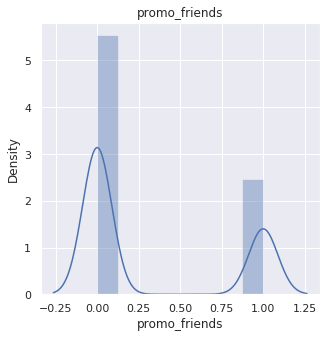

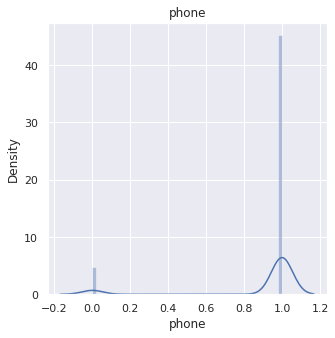

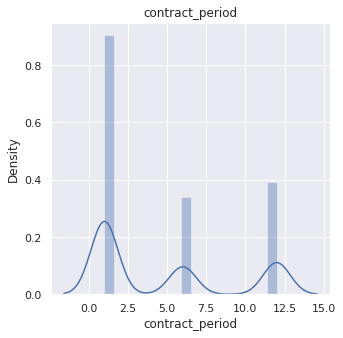

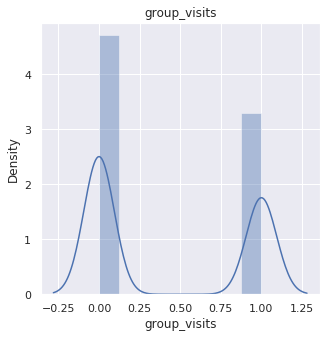

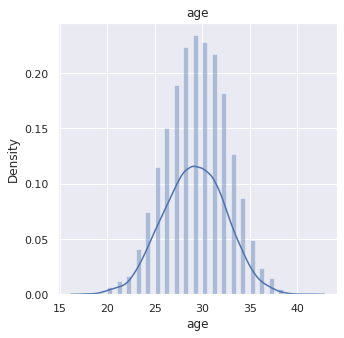

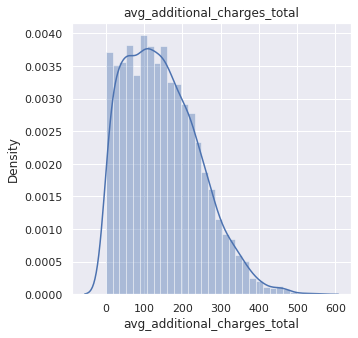

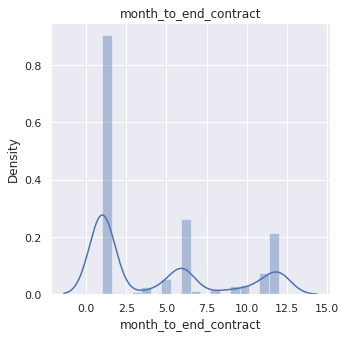

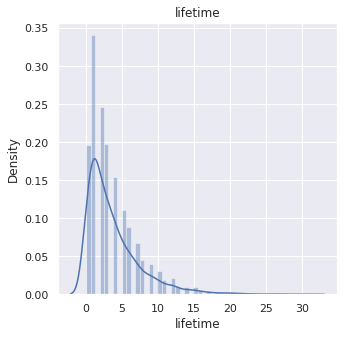

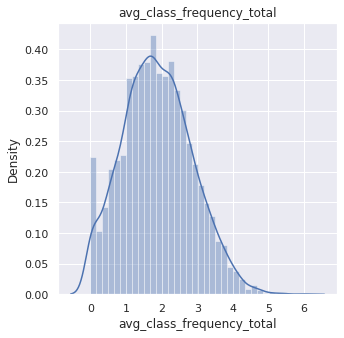

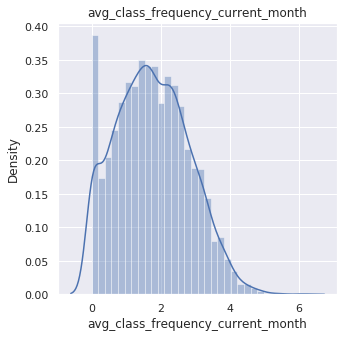

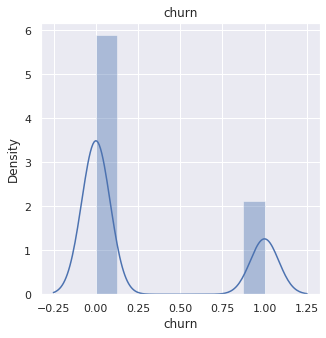

In [10]:
for column in df.columns:
    plt.figure(figsize=(5, 5))
    df.groupby('churn')[column]
    sns.distplot(df[column])
    plt.title(column)
    plt.show()

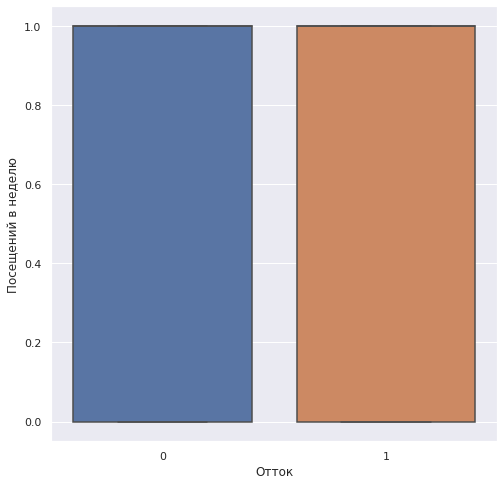

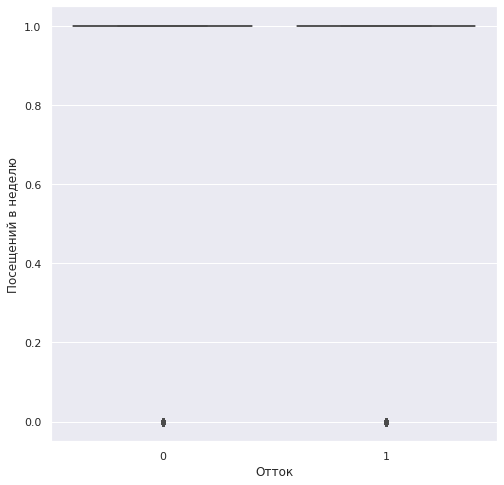

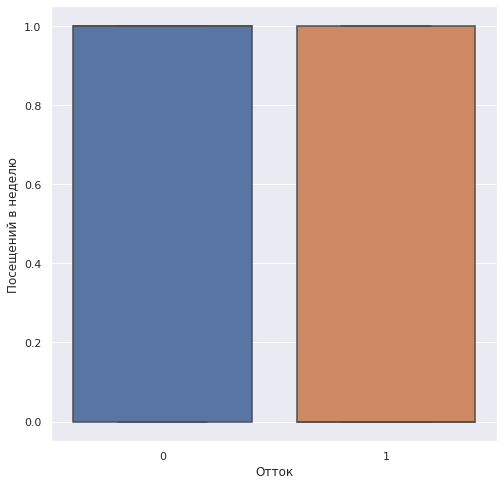

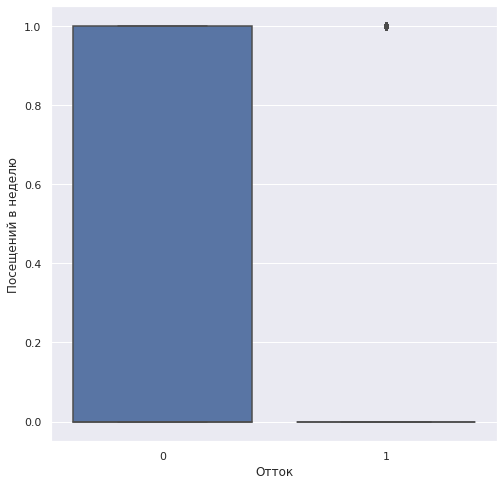

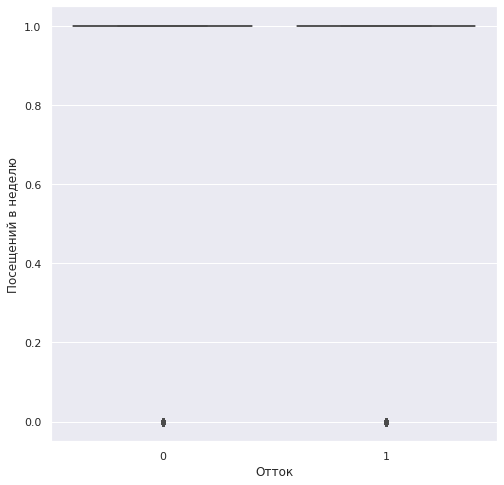

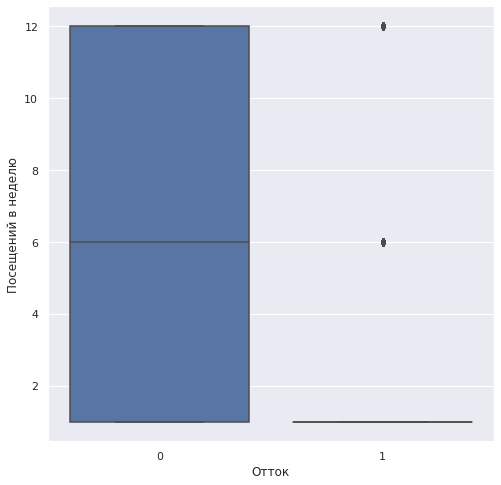

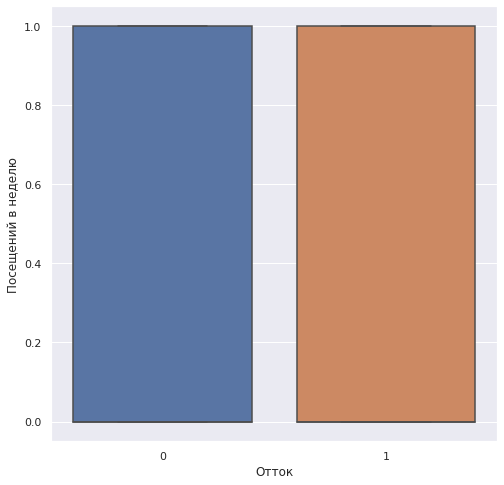

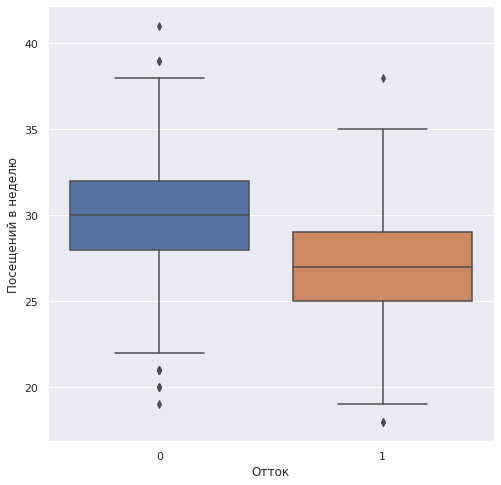

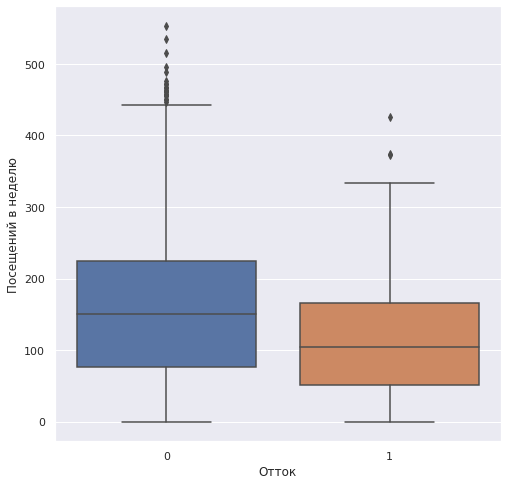

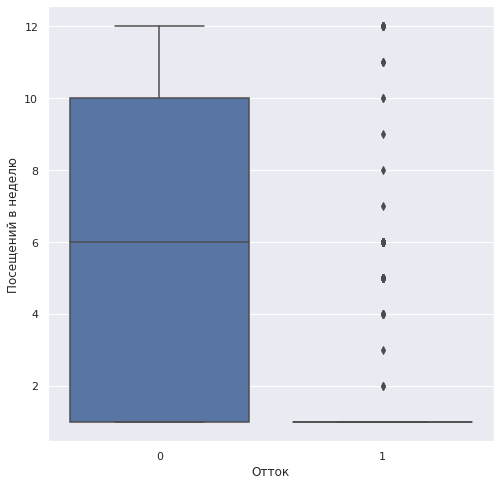

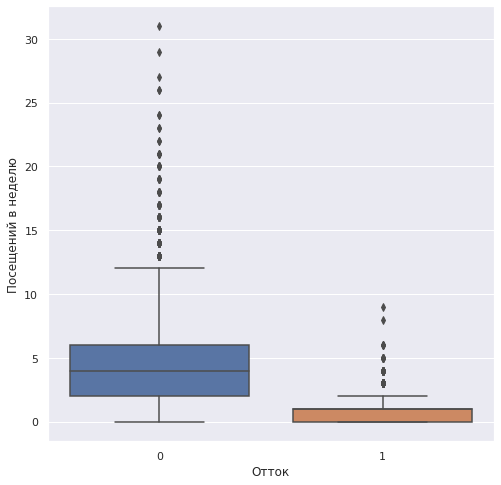

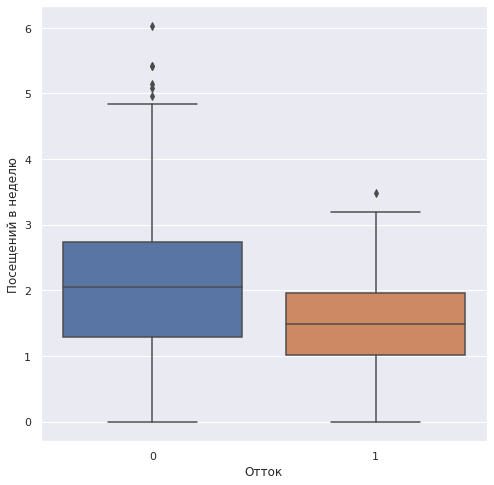

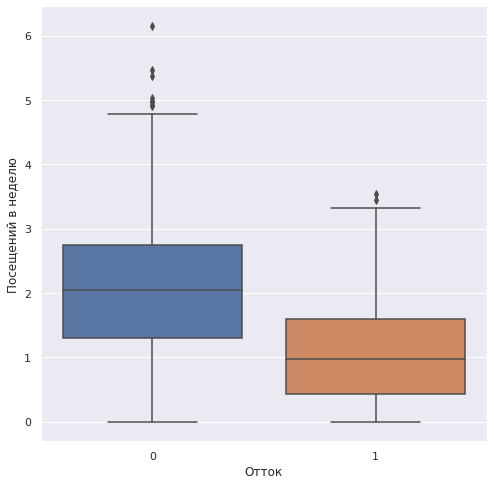

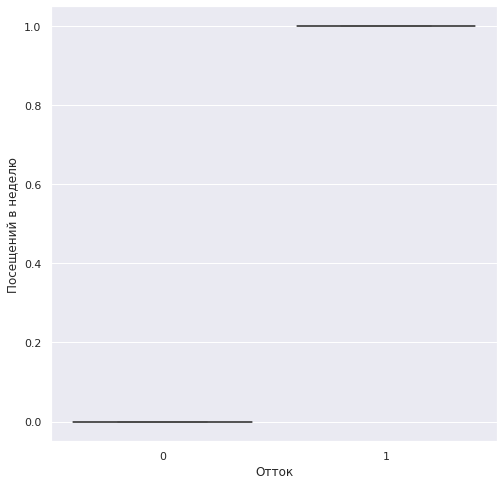

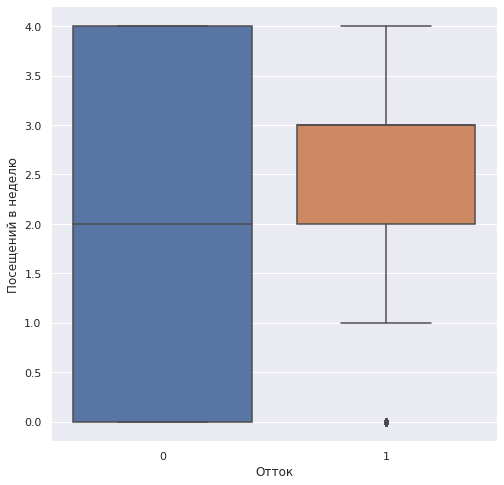

In [28]:
for column in df.columns:
    plt.figure(figsize=(8, 8))
    sns.boxplot(x = 'churn', y = df[column], data = df)
    plt.xlabel("Отток")
    plt.ylabel("Посещений в неделю")
    plt.show()

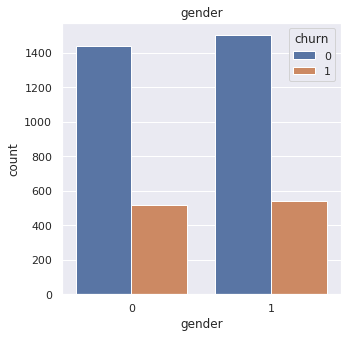

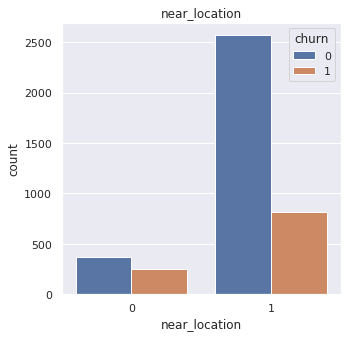

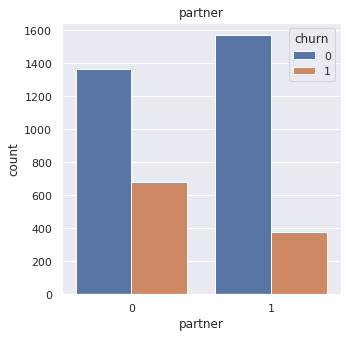

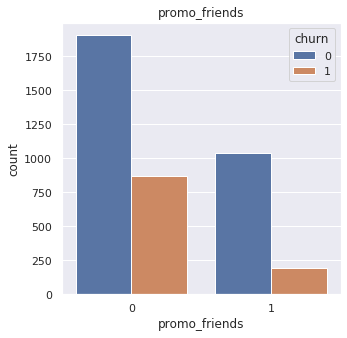

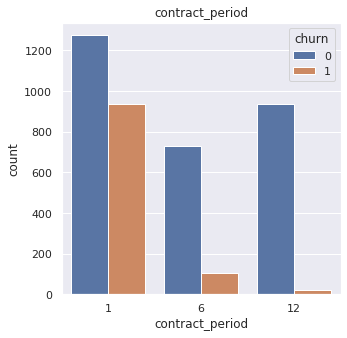

In [12]:
for column in ['gender', 'near_location', 'partner', 'promo_friends', 'contract_period']:
    plt.figure(figsize=(5, 5))
    sns.countplot(x = df[column], hue='churn', data=df)
    plt.title(column)
    plt.show()

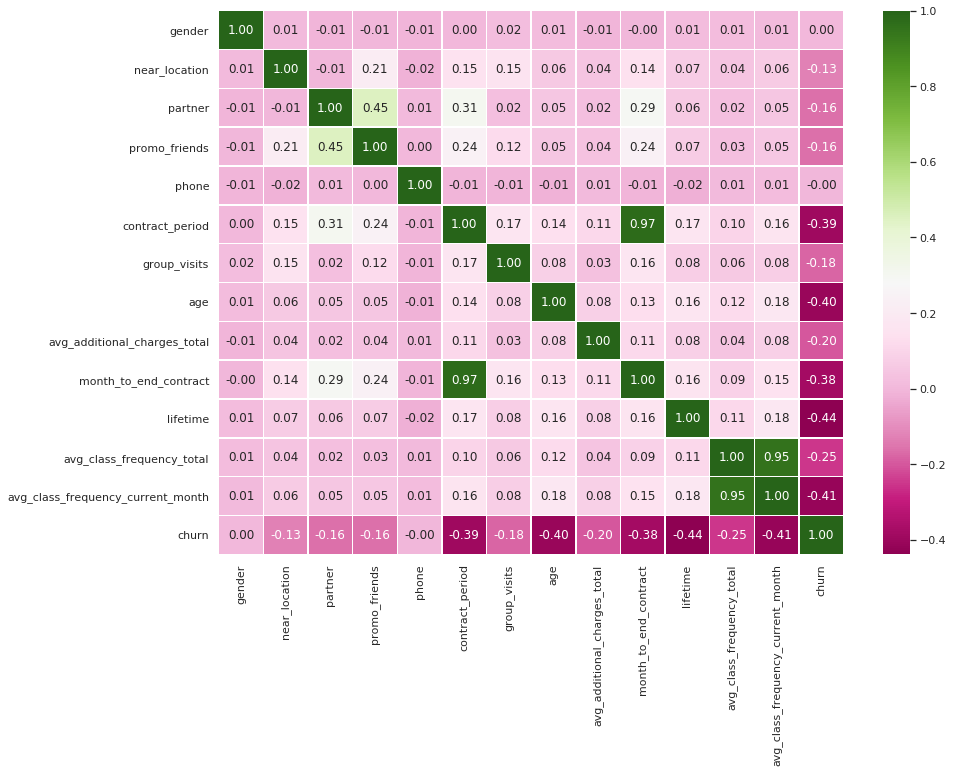

In [13]:
corr = df.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot = True, fmt = '0.2f', linewidths=.5, cmap="PiYG")
plt.show()

#### Вывод:  
чем больше партнеров и ближе к дому клуб тем выше показатель "приведи друга"  
количество партнеров, близость к дому и наличие друзей также положительно влияют на длительность действующего абонемента  

уровень оттока снижается если:  

- больше друзей  
- ближе к дому  
- больше партнеров  
- клиент постоянный (высокий лайфтайм)  
- человек старше  
- ходит часто и много тратит на доп.услуги  
- посещает групповые занятия  
  
признаки: month_to_end_contract и contract_period, а также avg_class_frequency_total и avg_class_frequency_current_month очень сильно коррелируют, так как являются очень близкими показателями, возможно по одному признаку из пары стоит удалить перед обучением.

# Постройте модель прогнозирования оттока клиентов

<div class="alert alert-warning">
<h3>Комментарий ревьюера</h3>

Можно использовать параметр stratify = y в функции train_test_split( ), где y – соответствующая целевая переменная. Данные разделятся на два кластера (наблюдения класса 0 и наблюдения класса 1), и в валидационную выборку попадут по 20% наблюдений из каждого кластера:
    
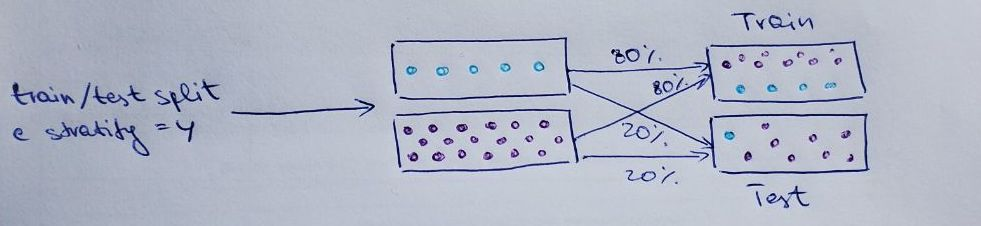
    
То есть, если соотношение классов в оригинальной выборке было 2:5, то в обучающей и валидационной выборках оно сохранится таким же. Такой подход в чем-то решает проблему несбалансированных классов.

In [14]:
X = df.drop('churn', axis = 1)
y = df['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [15]:
predictions = model.predict(X_test)
probabilities =  model.predict_proba(X_test)[:,1]

In [16]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, predictions)))

Accuracy: 0.91
Precision: 0.81
Recall: 0.81
F1: 0.81


In [17]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0) 
rf_model.fit(X_train_st, y_train)
rf_predictions = rf_model.predict(X_test_st) 
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]

In [18]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, rf_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, rf_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, rf_predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, rf_predictions)))

Accuracy: 0.92
Precision: 0.84
Recall: 0.81
F1: 0.83


#### Регрессия выглядит лучше

# Сделайте кластеризацию клиентов

In [19]:
df_sс = df.drop(['churn'], axis=1)
df_columns_list = df_sс.columns
df_sс = StandardScaler().fit_transform(df_sс)
df_sс = pd.DataFrame(df_sс, columns = df_columns_list).astype('float64')

In [20]:
linked = linkage(df_sс, method = 'ward')

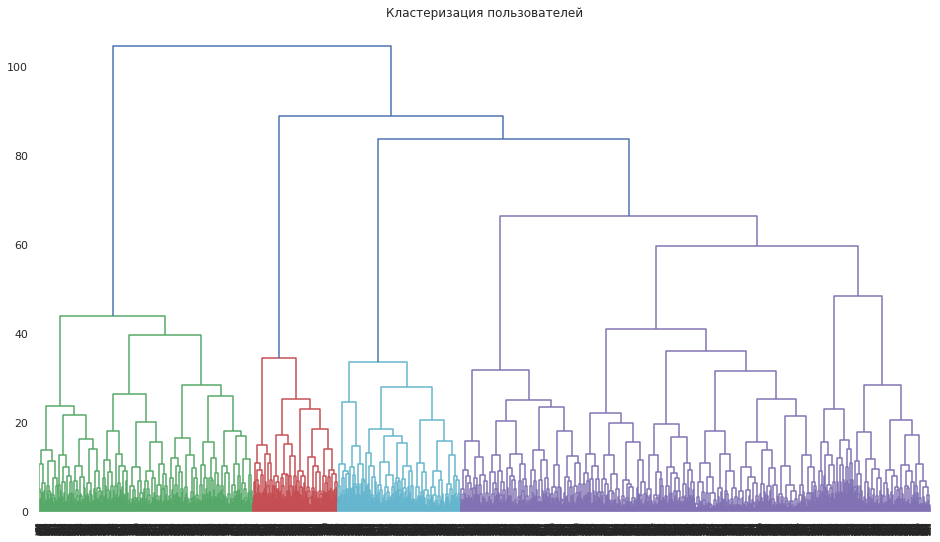

In [21]:
plt.figure(figsize=(16, 9))  
dendrogram(linked, orientation = 'top')
plt.title('Кластеризация пользователей')
plt.show()

In [22]:
km = KMeans(n_clusters = 5, random_state=0)
labels = km.fit_predict(df_sс)
df['cluster'] = labels

In [23]:
df.cluster.value_counts()

3    1262
0    1010
4    838 
2    505 
1    385 
Name: cluster, dtype: int64

In [24]:
df.groupby('cluster').mean().T

cluster,0,1,2,3,4
gender,0.50,0.52,0.50,0.49,0.56
near_location,0.96,0.86,0.00,1.00,0.98
partner,0.78,0.47,0.46,0.35,0.36
promo_friends,0.57,0.31,0.08,0.24,0.23
phone,1.00,0.00,1.00,1.00,1.00
contract_period,10.89,4.79,2.35,1.95,2.67
group_visits,0.54,0.43,0.22,0.34,0.47
age,29.98,29.30,28.48,28.17,30.13
avg_additional_charges_total,160.76,143.96,135.46,131.62,161.66
month_to_end_contract,9.95,4.48,2.20,1.86,2.46


### Выводы:  
#### Кластеры со склонностью к оттоку (в данном случае это 3 и 4 кластеры):  
- пользователей 4 кластера не так много, они примерно в середине срока действия абонемента. Возможно тут нужен индивидуальный подход, например персональный фитнес-тренер.  
- редко ходят на занятия в том числе на групповые ~ 1 раз в неделю 
- пришли без друзей  
- возраст примерно 28 лет.

#### Надежные кластеры: 1, 2, 5.  
##### Самый надежный 1 кластер:  
- жители района  
- сотрудники компаний-партнеров  
- занимаются с друзьями  
- постоянные клиенты с "длинным" абонементом и платящие за доп.услуги  
- регулярно посещают занятия  
##### Кластеры 1 и 5 хотя имеют самый низкий показатель оттока могут быть кандидатами на его повышение  
- нужно поощрять посещения  
- предлагать скидки при приближении окончания абонемента

### Построим графики распределения всех признаков по кластерам.

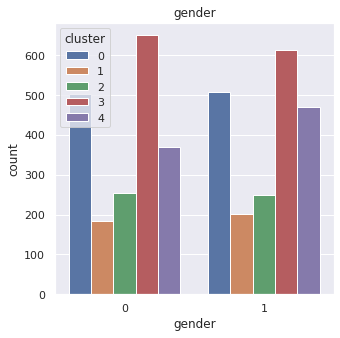

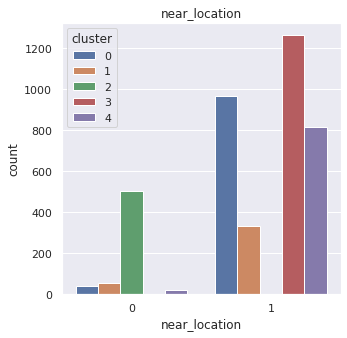

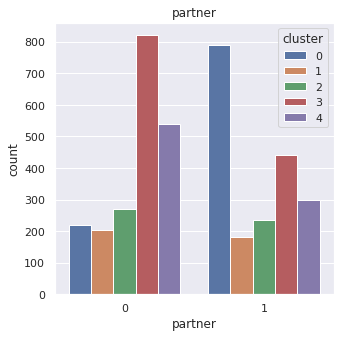

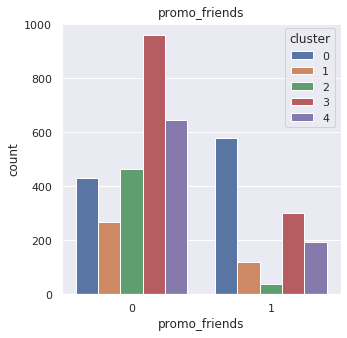

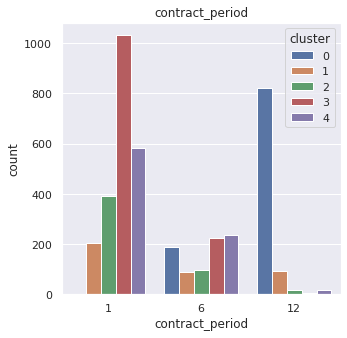

In [25]:
for column in ['gender', 'near_location', 'partner', 'promo_friends', 'contract_period']:
    plt.figure(figsize=(5, 5))
    sns.countplot(x = df[column], hue='cluster', data=df)
    plt.title(column)
    plt.show()

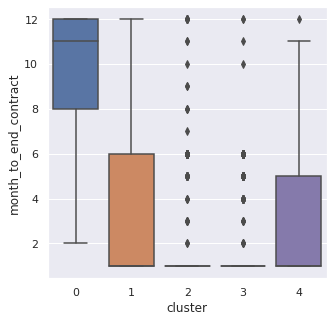

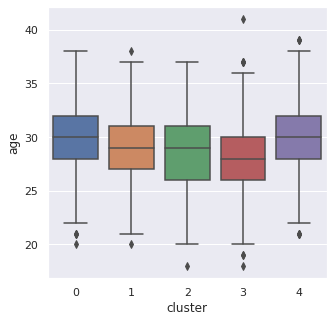

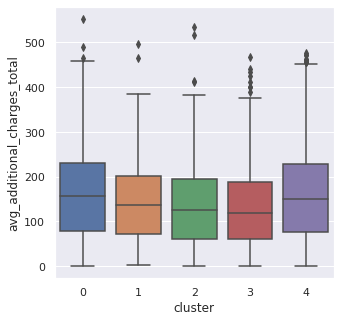

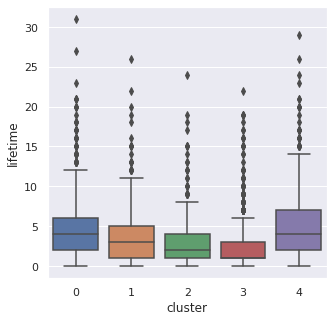

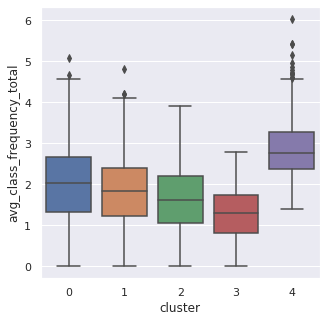

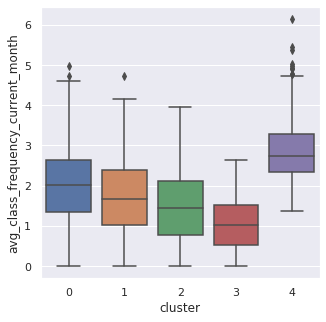

In [26]:
for column in ['month_to_end_contract', 'age', 'avg_additional_charges_total', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month']:
    plt.figure(figsize=(5, 5))
    sns.boxplot(x = 'cluster', y = df[column], data = df)
    plt.show()

# Сформулируйте выводы и сделайте базовые рекомендации по работе с клиентами.

#### Нам необходимо:  
- Поддерживать и мотивировать "хорошие кластеры".  
- Глубже сегментировать оттекающих, к каждому сегменту тестировать индивидуальные предложения.  
- Выстроить предиктивную систему аналитики и действовать не после оттока, а до него.  
- Привлечение новых клиентов по акции "приведи друга"  
- Активная реклама клуба в районе его расположения  
- Повышение вовлеченности на групповых занятиях (например внедрение элементов геймификации), поощрение их посещения  
- Расширение программы привлечения сотрудников компаний-партнеров и списка самих партнеров 